**Objective:** To train the cnn model and test its performance

**importing the necessary modules**

In [6]:
import numpy as np
import cv2
import os
from os import listdir
import time 
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle


import tensorflow as tf

from tensorflow.keras.models import Model, load_model

**Creating a function to load all the images and put it into arrays**

In [7]:
def load_data(dir_list, image_size):
    X = []
    y = []
    image_width, image_height = image_size

    for directory in dir_list:
        if directory.endswith('yes'):
            label = 1
        else:
            label=0

        for filename in os.listdir(directory):
            image_path = os.path.join(directory, filename)
            image = cv2.imread(image_path)

            if image is None:
                print(f"[WARN] Skipping unreadable image: {image_path}")
                continue

            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            image = cv2.resize(image, (image_width, image_height))
            image = image.reshape((image_width, image_height, 1))
            image = image / 255.0

            X.append(image)
            y.append([label])

    X = np.array(X)
    y = np.array(y)

    X, y = shuffle(X, y)

    print(f'✅ Number of examples: {len(X)}')
    print(f'✅ X shape: {X.shape}')
    print(f'✅ y shape: {y.shape}')

    return X, y

**Processing the loaded images and appending them into arrays**

In [8]:
augmented_path = r'C:\Users\Devab\OneDrive\Desktop\Coding\Projects\Tumor Classification\Augmented Data/'

# augmented data (yes and no) contains both the original and the new generated examples
yes_path = r"C:\Users\Devab\OneDrive\Desktop\Coding\Projects\Tumor Classification\Augmented Data\yes"
no_path =r"C:\Users\Devab\OneDrive\Desktop\Coding\Projects\Tumor Classification\Augmented Data\no"

IMG_WIDTH, IMG_HEIGHT = (240, 240)

X, y = load_data([yes_path, no_path], (IMG_WIDTH, IMG_HEIGHT))

✅ Number of examples: 10117
✅ X shape: (10117, 240, 240, 1)
✅ y shape: (10117, 1)


**Splitting the data into test and train**

In [9]:
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.2)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5)

**Loading the model**

In [10]:
model2=load_model("custom_detection_model.keras")

c:\Users\Devab\OneDrive\Desktop\Coding\Projects\Tumor Classification\venv\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [11]:
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return f"{h}:{m}:{round(s,1)}"

**Defining checkpoints and early stopping of training to reduce overfitting and reduce training time**

In [12]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint(
    "custom_best_model.keras",                # Use `.keras` format (recommended)
    monitor="val_accuracy",           # or "val_loss" if you prefer
    save_best_only=True,
    verbose=1,
    mode="max"                         # "min" for loss
)

early_stop = EarlyStopping(
    monitor="val_accuracy",
    patience=5,
    restore_best_weights=True
)

***Model-1***

**Training**

In [13]:
start_time = time.time()


model2.fit(x=X_train, y=y_train, batch_size=64, epochs=10,validation_data=(X_val, y_val),
    callbacks=[checkpoint, early_stop])


end_time = time.time()
execution_time = (end_time - start_time)
print(f"Elapsed time: {hms_string(execution_time)}")


Epoch 1/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6202 - loss: 0.6544
Epoch 1: val_accuracy improved from -inf to 0.51383, saving model to custom_best_model.keras
127/127 ━━━━━━━━━━━━━━━━━━━━ 167s 1s/step - accuracy: 0.6206 - loss: 0.6541 - val_accuracy: 0.5138 - val_loss: 0.7424
Epoch 2/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7271 - loss: 0.5493
Epoch 2: val_accuracy improved from 0.51383 to 0.52569, saving model to custom_best_model.keras
127/127 ━━━━━━━━━━━━━━━━━━━━ 199s 2s/step - accuracy: 0.7272 - loss: 0.5492 - val_accuracy: 0.5257 - val_loss: 0.7499
Epoch 3/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7686 - loss: 0.4967
Epoch 3: val_accuracy did not improve from 0.52569
127/127 ━━━━━━━━━━━━━━━━━━━━ 198s 2s/step - accuracy: 0.7687 - loss: 0.4966 - val_accuracy: 0.4901 - val_loss: 1.8023
Epoch 4/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8046 - loss: 0.4493
Epoch 4: val_accuracy improved from 0.52569 to 0.58498, saving mod

**Training for some more epochs**

In [14]:
start_time = time.time()

model2.fit(x=X_train, y=y_train, batch_size=64, epochs=5,validation_data=(X_val, y_val),
    callbacks=[checkpoint, early_stop])

end_time = time.time()
execution_time = (end_time - start_time)
print(f"Elapsed time: {hms_string(execution_time)}")


Epoch 1/5
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8436 - loss: 0.3796
Epoch 1: val_accuracy did not improve from 0.81818
127/127 ━━━━━━━━━━━━━━━━━━━━ 196s 2s/step - accuracy: 0.8436 - loss: 0.3796 - val_accuracy: 0.5109 - val_loss: 1.4281
Epoch 2/5
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8518 - loss: 0.3654
Epoch 2: val_accuracy did not improve from 0.81818
127/127 ━━━━━━━━━━━━━━━━━━━━ 199s 2s/step - accuracy: 0.8519 - loss: 0.3653 - val_accuracy: 0.7955 - val_loss: 0.4132
Epoch 3/5
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8598 - loss: 0.3485
Epoch 3: val_accuracy improved from 0.81818 to 0.84091, saving model to custom_best_model.keras
127/127 ━━━━━━━━━━━━━━━━━━━━ 199s 2s/step - accuracy: 0.8598 - loss: 0.3485 - val_accuracy: 0.8409 - val_loss: 0.3638
Epoch 4/5
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8609 - loss: 0.3399
Epoch 4: val_accuracy did not improve from 0.84091
127/127 ━━━━━━━━━━━━━━━━━━━━ 208s 2s/step - accuracy: 0.8610 

In [24]:
start_time = time.time()

model2.fit(x=X_train, y=y_train, batch_size=64, epochs=5,validation_data=(X_val, y_val),
    callbacks=[checkpoint, early_stop])

end_time = time.time()
execution_time = (end_time - start_time)
print(f"Elapsed time: {hms_string(execution_time)}")

Epoch 1/5
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8735 - loss: 0.3226
Epoch 1: val_accuracy did not improve from 0.84091
127/127 ━━━━━━━━━━━━━━━━━━━━ 218s 2s/step - accuracy: 0.8735 - loss: 0.3226 - val_accuracy: 0.7095 - val_loss: 0.7005
Epoch 2/5
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8702 - loss: 0.3347
Epoch 2: val_accuracy did not improve from 0.84091
127/127 ━━━━━━━━━━━━━━━━━━━━ 219s 2s/step - accuracy: 0.8702 - loss: 0.3346 - val_accuracy: 0.7460 - val_loss: 0.4766
Epoch 3/5
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8843 - loss: 0.3081
Epoch 3: val_accuracy did not improve from 0.84091
127/127 ━━━━━━━━━━━━━━━━━━━━ 211s 2s/step - accuracy: 0.8842 - loss: 0.3082 - val_accuracy: 0.7164 - val_loss: 0.7669
Epoch 4/5
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8932 - loss: 0.2827
Epoch 4: val_accuracy did not improve from 0.84091
127/127 ━━━━━━━━━━━━━━━━━━━━ 209s 2s/step - accuracy: 0.8931 - loss: 0.2828 - val_accuracy: 0.6966 - val_l

**Getting the training history to plot  the graph of loss vs accuracy**

In [15]:
hist=model2.history.history

In [16]:
for key in hist.keys():
    print(key)

accuracy
loss
val_accuracy
val_loss


**Function to plot the graphs**

In [17]:
def plot_metrics(history):
    
    train_loss = history['loss']
    val_loss = history['val_loss']
    train_acc = history['accuracy']
    val_acc = history['val_accuracy']
    
    # Loss
    plt.figure()
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Loss')
    plt.legend()
    plt.show()
    
    # Accuracy
    plt.figure()
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()
    plt.show()

**Plotting the metrics of the training**

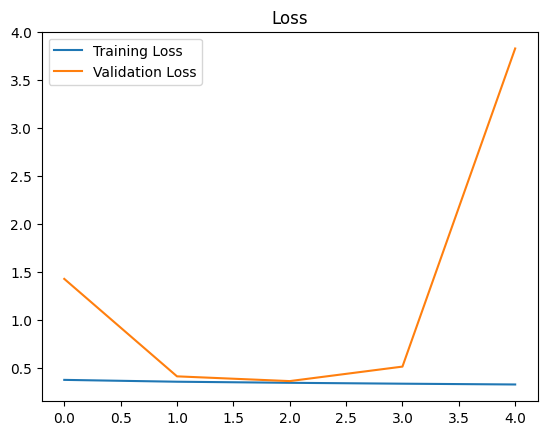

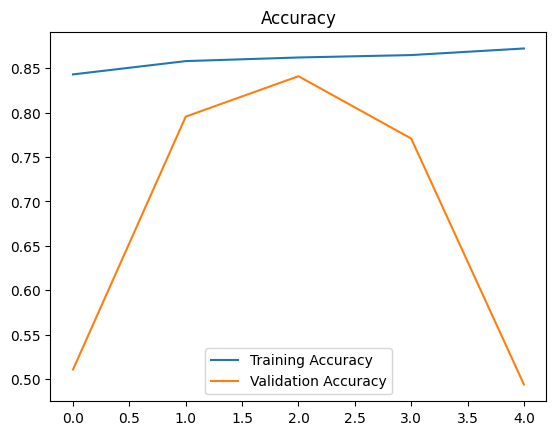

In [18]:
plot_metrics(hist) 


**Loading the best model and evaluating it**

In [19]:
best=load_model("custom_best_model.keras")

In [20]:
best.metrics_names


['loss', 'compile_metrics']

In [21]:
loss, acc = best.evaluate(x=X_test, y=y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 139ms/step - accuracy: 0.8358 - loss: 0.3657


In [22]:
print (f"Test Loss = {loss}")
print (f"Test Accuracy = {acc}")

Test Loss = 0.35699617862701416
Test Accuracy = 0.8399209380149841


In [23]:
# Predict probabilities
y_pred_probs = best.predict(X_test)

# Convert to binary predictions
y_pred = (y_pred_probs > 0.5).astype(int).flatten()


y_true = y_test.flatten()

# Calculate F1
from sklearn.metrics import f1_score
f1 = f1_score(y_true, y_pred)
print(f"F1 Score: {f1:.4f}")


32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 151ms/step
F1 Score: 0.8370


<hr>